In [14]:
import sys
sys.path.append('./include/')
import AtFtirAnalysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
raw = pd.read_pickle('../export/one_to_rule_them_all.p')

# get rid of time as index and convert time to integers
raw.reset_index(inplace=True)
raw.time = [int(time) for time in raw.time]

raw.head()

,time,date,name,3497.0,3495.0,3493.0,3491.0,3489.0,3487.0,3485.0,...,766.0,764.0,762.0,760.0,758.0,756.0,754.0,752.0,750.0,748.0
0,0,171018,RF Versuche IB 1,0.01977,0.02558,0.03143,0.03403,0.03211,0.03123,0.03825,...,-0.01817,-0.01928,-0.01998,-0.02046,-0.02084,-0.02093,-0.02086,-0.02100,-0.02138,-0.02189
1,1,171018,RF Versuche IB 1,0.02542,0.02572,0.02607,0.02713,0.02884,0.03297,0.03866,...,-0.01666,-0.01754,-0.01814,-0.01863,-0.01902,-0.01909,-0.01910,-0.01941,-0.01980,-0.02007
2,2,171018,RF Versuche IB 1,0.02223,0.02473,0.02741,0.02952,0.02881,0.02675,0.02818,...,-0.01429,-0.01530,-0.01603,-0.01638,-0.01649,-0.01657,-0.01665,-0.01676,-0.01703,-0.01731
3,3,171018,RF Versuche IB 1,0.02543,0.03199,0.03711,0.03727,0.03048,0.02647,0.03533,...,-0.01236,-0.01325,-0.01368,-0.01396,-0.01424,-0.01427,-0.01430,-0.01469,-0.01500,-0.01495
4,4,171018,RF Versuche IB 1,0.01587,0.02425,0.03110,0.03197,0.02946,0.02912,0.03445,...,-0.01034,-0.01125,-0.01199,-0.01244,-0.01256,-0.01246,-0.01244,-0.01271,-0.01305,-0.01322


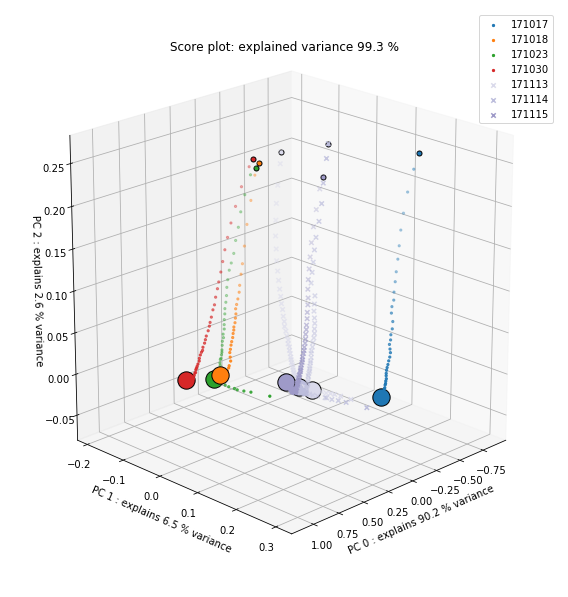

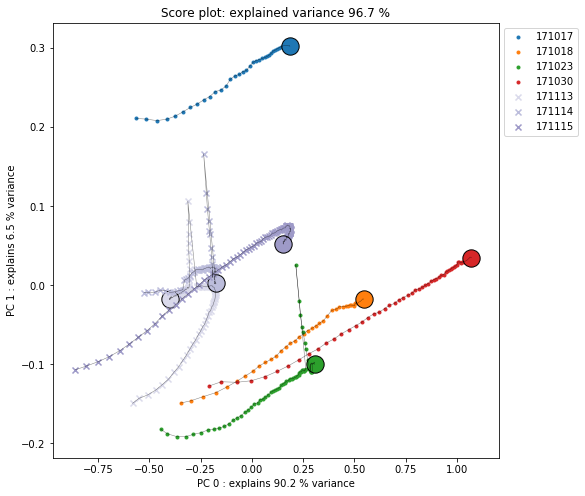

In [94]:
ftir = AtFtirAnalysis.AtFtirAnalysis(raw)


# water vapor: 1700 until 1900
# interesting range: 1650 until 1700 without low pass filter
# amide 1 band: 1600 until 1700
# amide 2 band: ??
# amide 3 band: 1100 until 1500

# ? 1590 until 1700 models urea ?
# and 1400 until ~ 1590 separates blanks from refolds ?
ftir.take_slice(low=1400,high=1590)

ftir.normalize_std()
ftir.gradient(order=2)
#ftir.low_pass_filter()

ftir.pca()
ax = ftir.plot_pca_3d()

ax = ftir.plot_pca()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06f4f502b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f06f4ecdfd0>], dtype=object)

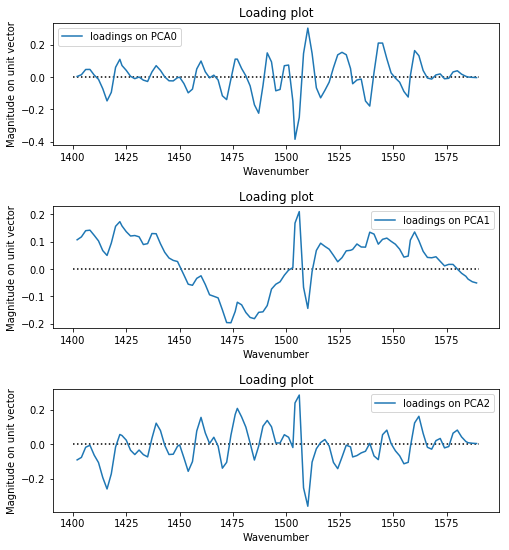

In [95]:
ftir.plot_pca_loadings()

/home/moritz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


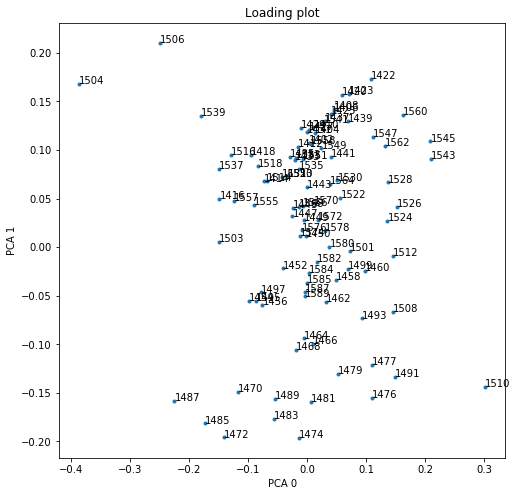

In [96]:
ftir.plot_pca_loadings_versus(p0=0, p1=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06f3c2f278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f06f221ad68>], dtype=object)

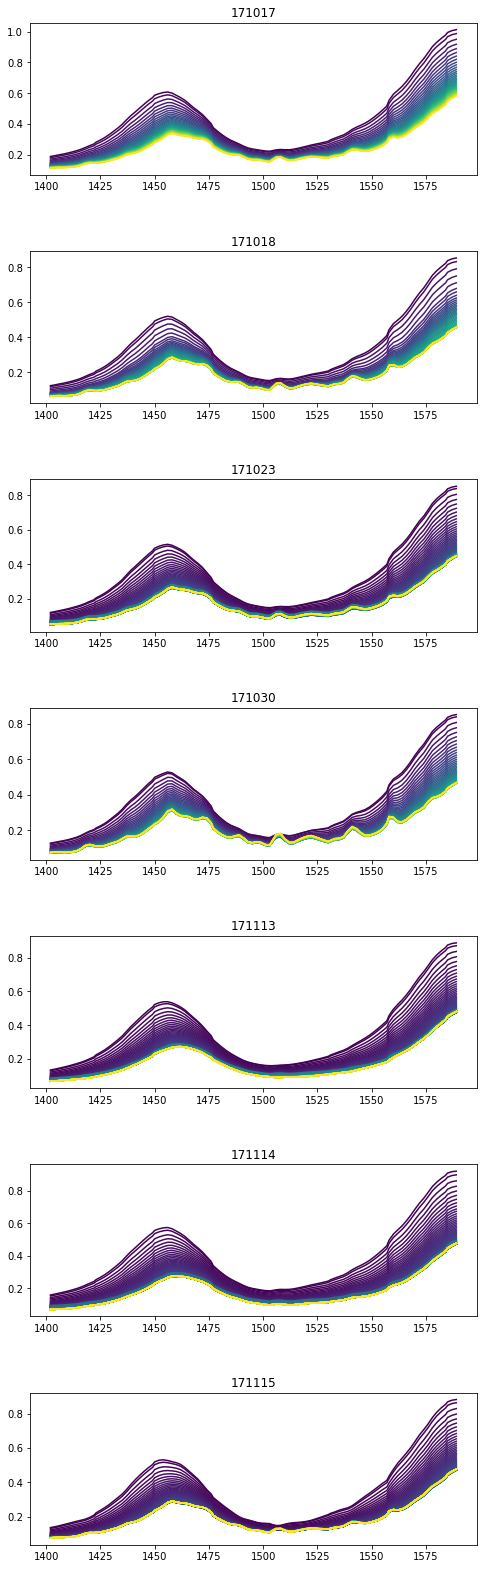

In [97]:
ftir.plot_raw_spectra(step=1, as_analysis=1)